In [1]:
from os import path
from os.path import basename, exists, join
from glob import glob
import random
import librosa
import soundfile as sf
from meldataset import mel_spectrogram
import torch
import librosa.display
import numpy as np

In [8]:
# en filelist
dir_ = 'encom'
trainfile = join(dir_, 'training.txt')
valfile = join(dir_, 'validation.txt')
wavdir = join(dir_, 'wavs')
files = glob(join(wavdir, '*.wav'))
print(f'{len(files)} files')
random.shuffle(files)
nfiles = 150
trainfiles = files[:-nfiles]
valfiles = files[-nfiles:]
with open(trainfile, 'w') as f:
    [f.write(basename(path)[:-4] + '|no text\n') for path in trainfiles]
with open(valfile, 'w') as f:
    [f.write(basename(path)[:-4] + '|no text\n') for path in valfiles]

61170 files


torch.Size([1, 80, 358]) tensor([[[-2.3462, -2.5994, -2.6294,  ..., -1.4119, -1.5273, -1.6623],
         [-2.1595, -2.2843, -2.5011,  ..., -0.8890, -1.0408, -1.2403],
         [-1.2685, -1.2007, -1.4221,  ..., -1.5886, -1.6830, -1.9457],
         ...,
         [-2.9274, -2.7283, -2.6653,  ..., -3.6809, -4.1011, -4.6178],
         [-2.7873, -2.5753, -2.5557,  ..., -3.5575, -3.9913, -4.5817],
         [-2.8756, -2.8695, -2.8595,  ..., -3.7558, -4.1119, -4.5879]]])


/home/xindetai/.local/lib/python3.7/site-packages/torch/functional.py:573: UserWarning: stft will soon require the return_complex parameter be given for real inputs, and will further require that return_complex=True in a future PyTorch release. (Triggered internally at  ../aten/src/ATen/native/SpectralOps.cpp:659.)
  normalized, onesided, return_complex)


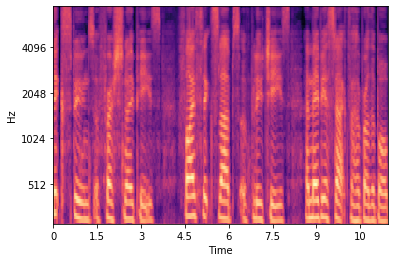

In [2]:
wav, sr = sf.read('./encom/wavs/p225_003.wav')
mel = mel_spectrogram(torch.FloatTensor(wav).unsqueeze(0), 1024, 80, sr, 256, 1024, 80, 7600)
print(mel.shape, mel)
mel = mel.squeeze().numpy()
librosa.display.specshow(mel, x_axis='time', y_axis='mel', sr=sr, fmin=80, fmax=7600)

(80, 359) [[-4.65731869 -4.98358489 -5.46052183 ... -2.55417936 -2.86913266
  -3.13992468]
 [-4.38864646 -4.34530924 -5.00927116 ... -1.90085139 -2.28775624
  -2.48070198]
 [-2.4213469  -2.09460391 -2.19738762 ... -2.81813593 -3.31842158
  -3.46877699]
 ...
 [-6.01889944 -5.5168489  -5.28950241 ... -7.69013813 -8.73886837
  -9.46313564]
 [-5.67248831 -5.19634464 -4.98703303 ... -7.53448253 -8.46884738
  -9.62434472]
 [-5.69560956 -5.74032825 -5.65050856 ... -7.77445669 -8.67735358
  -9.30256112]]


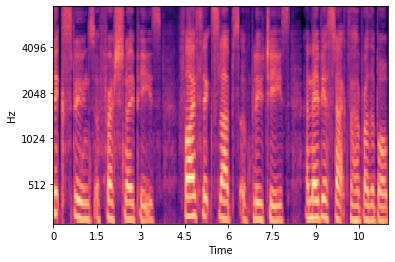

In [3]:
mel2 = librosa.feature.melspectrogram(y=wav, sr=sr, n_fft=1024,
                                hop_length=256, n_mels=80, fmin=80, fmax=7600,
                                power=2)
ref = mel2.max()
mel_db = np.log10(np.maximum(mel2, 1e-10)) - np.log10(ref)
print(mel_db.shape, mel_db)
librosa.display.specshow(mel_db, x_axis='time', y_axis='mel', sr=sr, fmin=80, fmax=7600)

In [4]:
dis = mel - mel_db[:,:-1]
print(dis)

[[2.31114635 2.38414669 2.83108724 ... 0.94463799 1.02684253 1.20678415]
 [2.22911821 2.06104015 2.50813056 ... 0.82072453 0.86010101 1.04750184]
 [1.15289426 0.89394964 0.7752928  ... 1.10392515 1.13517948 1.37275563]
 ...
 [3.0915246  2.78852544 2.62416485 ... 3.43974943 3.58906248 4.1210834 ]
 [2.88519678 2.62101296 2.43135991 ... 3.28181818 3.54316335 3.88712845]
 [2.82003974 2.87083858 2.79096666 ... 3.43096454 3.66257353 4.08942243]]
